In [1]:
import pandas as pd
dataset = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/Finance/main/dataset/Swedish%20auto%20insurance%20data/Sweden%20data.csv")
dataset

,X,Y
0,23,56.90
1,29,121.02
2,15,12.32
3,222,78.25
4,120,777.10
...,...,...
63,9,87.40
64,31,209.80
65,14,95.50
66,53,244.60


In [2]:
dataset.describe()

,X,Y
count,68.000000,68.000000
mean,27.235294,106.343971
std,34.920001,118.398094
min,0.000000,0.000000
25%,8.000000,39.225000
50%,15.500000,74.750000
75%,29.250000,138.950000
max,222.000000,777.100000


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68 entries, 0 to 67
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       68 non-null     int64  
 1   Y       68 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.2 KB


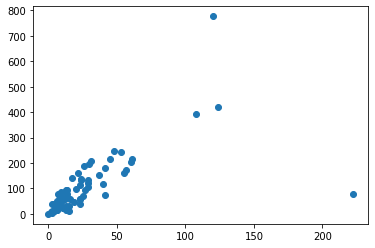

In [4]:
import matplotlib.pyplot as plt
x=dataset.iloc[:,:1]
y=dataset.iloc[:,-1]
plt.scatter(x,y)
plt.show()

In [5]:
dataset.isnull().sum()

X    0
Y    0
dtype: int64

In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=3)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(54, 1)
(14, 1)
(54,)
(14,)


In [7]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
prediction1=lr.predict(x_test)
prediction1

array([111.94898621,  78.77710792,  76.63698674,  70.2166232 ,
        88.40765323,  84.12741087,  75.56692615, 196.48377282,
       120.50947093, 192.20353046,  70.2166232 ,  78.77710792,
        68.07650202, 115.15916798])

In [8]:
import numpy as np
from sklearn import metrics
rmse1=np.sqrt(metrics.mean_squared_error(y_test,prediction1))
r2_score1=metrics.r2_score(y_test,prediction1)
print(rmse1)
print(r2_score1)

179.13732864538989
0.23384636949529003


In [9]:
lr.coef_

array([1.07006059])

In [10]:
lr.intercept_

63.79625966205492

In [12]:
lr.score(x_test,y_test)

0.23384636949529003

In [13]:
lr.score(x_train,y_train)

0.2374238266050127

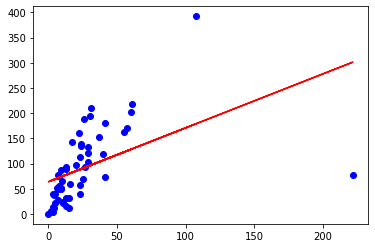

In [14]:
plt.scatter(x_train,y_train,color='blue')
plt.plot(x_train,lr.predict(x_train),color='red')
plt.show()

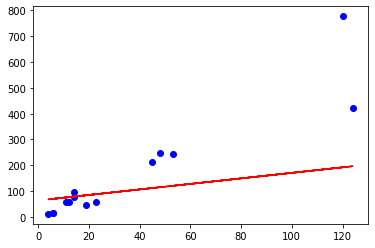

In [15]:
plt.scatter(x_test,y_test,color='blue')
plt.plot(x_test,lr.predict(x_test),color='red')
plt.show()

In [16]:
from sklearn.linear_model import SGDRegressor
import time
start_time=time.time()
sgd=SGDRegressor()
sgd.fit(x_train,y_train)
prediction2=sgd.predict(x_test)
prediction2

array([9.62133239e+11, 2.97777614e+11, 2.54915960e+11, 1.26331001e+11,
       4.90655053e+11, 4.04931747e+11, 2.33485134e+11, 2.65516854e+12,
       1.13357985e+12, 2.56944524e+12, 1.26331001e+11, 2.97777614e+11,
       8.34693474e+10, 1.02642572e+12])

In [17]:
elapsed_time=time.time()-start_time
print(elapsed_time)

14.866042613983154


In [18]:
sgd.coef_

array([2.14308266e+10])

In [19]:
sgd.intercept_

array([-2.25395906e+09])

In [20]:
sgd.score(x_test,y_test)

-3.011093342368901e+19

In [21]:
sgd.score(x_train,y_train)

-1.4886478646457945e+20

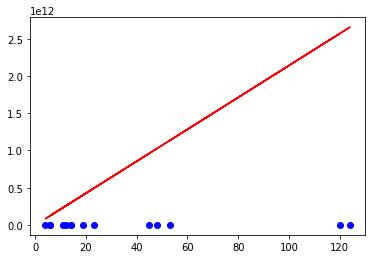

In [22]:
plt.scatter(x_test,y_test,color='blue')
plt.plot(x_test,sgd.predict(x_test),color='red')
plt.show()

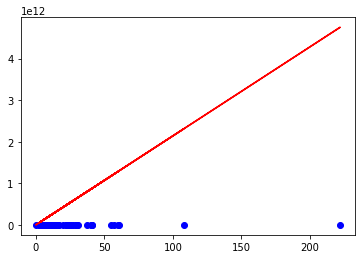

In [23]:
plt.scatter(x_train,y_train,color='blue')
plt.plot(x_train,sgd.predict(x_train),color='red')
plt.show()

In [24]:
rmse2=np.sqrt(metrics.mean_squared_error(y_test,prediction2))
r2_score2=metrics.r2_score(y_test,prediction2)
print(rmse2)
print(r2_score2)

1123027189274.3289
-3.011093342368901e+19


In [25]:
from sklearn.linear_model import Ridge
ridge=Ridge(alpha=0.01)
ridge.fit(x_train,y_train)
prediction3=ridge.predict(x_test)
prediction3

array([111.94898264,  78.7771099 ,  76.63698908,  70.21662662,
        88.4076536 ,  84.12741196,  75.56692867, 196.48375508,
       120.50946592, 192.20351344,  70.21662662,  78.7771099 ,
        68.0765058 , 115.15916387])

In [26]:
rmse3=np.sqrt(metrics.mean_squared_error(y_test,prediction3))
r2_score3=metrics.r2_score(y_test,prediction3)
print(rmse3)
print(r2_score3)

179.1373351031984
0.2338463142564008


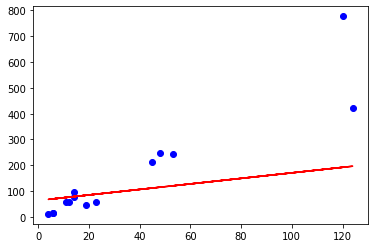

In [28]:
plt.scatter(x_test,y_test,color='blue')
plt.plot(x_test,ridge.predict(x_test),color='red')
plt.show()

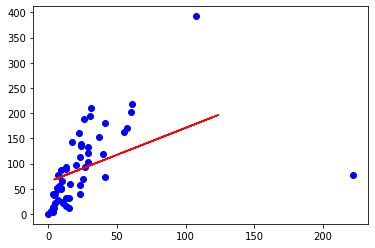

In [29]:
plt.scatter(x_train,y_train,color='blue')
plt.plot(x_test,ridge.predict(x_test),color='red')
plt.show()